In [ ]:
'''
pandas: fast data cleaning prep and analysis
built on top of numpy easy to work with arrays and matrices
(series and dataframes)
'''

In [ ]:
'''
Indexing in pandas
index: list of ints or labels to identify columns 
or rows

series object: row or column that is indexed

'''

In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [3]:
#creating series of 8 values
#the index will have its own labels
series_obj = Series(np.arange(8), index = ['row_1', 'row_2', 'row_3', 'row_4', 'row_5', 'row_6', 'row_7', 'row_8'])
series_obj

row_1    0
row_2    1
row_3    2
row_4    3
row_5    4
row_6    5
row_7    6
row_8    7
dtype: int32

In [4]:
#using label index to select a row
series_obj['row_7']

6

In [7]:
#using integer index
series_obj[[6,7]]

row_7    6
row_8    7
dtype: int32

In [10]:
#using special index call
np.random.seed(25)

#using rand to fill out a random df
#reshape puts the numbers into a matrix of x rows and y columns
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)), index = ['row_1', 'row_2', 'row_3', 'row_4', 'row_5', 'row_6'],
                  columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])

DF_obj

,col1,col2,col3,col4,col5,col6
row_1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row_2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row_3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row_4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row_5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row_6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [14]:
#ix retrieves a specific set of column and rows
DF_obj.loc[['row_2', 'row_5'], ['col5', 'col2']]

,col5,col2
row_2,0.402366,0.437611
row_5,0.421004,0.559053


# Data Slicing
### select and retrieve records from starting label index to the ending label index and every record in between

In [15]:
series_obj['row_3' : 'row_7']

row_3    2
row_4    3
row_5    4
row_6    5
row_7    6
dtype: int32

# Comparing with scalars

In [16]:
#returning all the values less than .2
DF_obj < .2

,col1,col2,col3,col4,col5,col6
row_1,False,False,False,True,False,True
row_2,False,False,False,False,False,True
row_3,False,False,True,False,False,False
row_4,False,False,False,False,False,False
row_5,False,False,True,False,False,False
row_6,False,False,False,False,False,False


# Filtering with scalars


In [17]:
#finding rows with value greater than 6

series_obj[series_obj > 6]

row_8    7
dtype: int32

# Setting values with scalars


In [19]:
series_obj['row_1', 'row_5', 'row_8'] = 8
series_obj


row_1    8
row_2    1
row_3    2
row_4    3
row_5    8
row_6    5
row_7    6
row_8    8
dtype: int32

# Missing values in python

In [21]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

## Figuring out which data is missing

In [22]:
missing = np.nan

series_obj = Series(['row_1', 'row_2', missing, 'row_4', missing, 'row_6'])

series_obj

0    row_1
1    row_2
2      NaN
3    row_4
4      NaN
5    row_6
dtype: object

In [24]:
#isnull() returns boolean for wether an element in the pandas dataframe is a null value
series_obj.isnull()

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

### so index 2 and 4 are in fact null values

## Filling missing values

In [25]:
#setting up a seed for random numbers
np.random.seed(25)

#create dataframe
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [27]:
#setting some of the numbers in the dataframe to be missing values
DF_obj.iloc[3:5, 0] = missing
DF_obj.iloc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [29]:
#fillna() finds missing values and fills them with a numeric value that I've passed in
filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,0.000000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,0.000000
3,0.000000,-0.419678,2.294842,-2.594487,2.822756,0.000000
4,0.000000,-1.976254,0.533340,-0.290870,-0.513520,0.000000
5,0.000000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [30]:
#passing a dictionary to the fillna() to particular columns
filled_DF2 = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF2

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,1.250000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,1.250000
3,0.100000,-0.419678,2.294842,-2.594487,2.822756,1.250000
4,0.100000,-1.976254,0.533340,-0.290870,-0.513520,1.250000
5,0.100000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [32]:
#ffill fills forwards missing values with the value of the last non-null element in the column
filled_DF3 = DF_obj.fillna(method = 'ffill')
filled_DF3

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.222326
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-0.222326
3,2.152957,-0.419678,2.294842,-2.594487,2.822756,-0.222326
4,2.152957,-1.976254,0.533340,-0.290870,-0.513520,-0.222326
5,2.152957,-1.839905,1.607671,0.388292,0.399732,0.405477


# Counting missing values

In [33]:
#isnull().sum() generates a count of missing values based of a boolean matrix
#create dataframe
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))

#setting some of the numbers in the dataframe to be missing values
DF_obj.iloc[3:5, 0] = missing
DF_obj.iloc[1:4, 5] = missing

DF_obj

,0,1,2,3,4,5
0,0.217002,-0.633439,0.246622,-1.939546,0.114060,-1.885341
1,0.243080,-0.705481,0.364628,-0.502952,-0.225752,NaN
2,0.103395,2.018408,1.094248,1.662434,-0.627453,NaN
3,NaN,-0.374879,-0.544329,0.287761,-0.205820,NaN
4,NaN,-0.222040,-1.622706,0.312541,-1.160421,0.313560
5,0.471998,0.577862,0.505407,-0.626488,-0.346369,-2.065942


In [34]:
DF_obj.isnull().sum()

0    2
1    0
2    0
3    0
4    0
5    3
dtype: int64

## Filtering out missing values


In [35]:
DF_no_nan = DF_obj.dropna()
DF_no_nan

,0,1,2,3,4,5
0,0.217002,-0.633439,0.246622,-1.939546,0.114060,-1.885341
5,0.471998,0.577862,0.505407,-0.626488,-0.346369,-2.065942


In [36]:
#Dropping columns that have missing values instead of rows
DF_no_nan = DF_obj.dropna(axis = 1)
DF_no_nan

,1,2,3,4
0,-0.633439,0.246622,-1.939546,0.114060
1,-0.705481,0.364628,-0.502952,-0.225752
2,2.018408,1.094248,1.662434,-0.627453
3,-0.374879,-0.544329,0.287761,-0.205820
4,-0.222040,-1.622706,0.312541,-1.160421
5,0.577862,0.505407,-0.626488,-0.346369


In [37]:
#dropping only rows if all columns have missing values, so the entire row is filled with nulls
DF_obj.dropna(how = 'all')
DF_obj

,0,1,2,3,4,5
0,0.217002,-0.633439,0.246622,-1.939546,0.114060,-1.885341
1,0.243080,-0.705481,0.364628,-0.502952,-0.225752,NaN
2,0.103395,2.018408,1.094248,1.662434,-0.627453,NaN
3,NaN,-0.374879,-0.544329,0.287761,-0.205820,NaN
4,NaN,-0.222040,-1.622706,0.312541,-1.160421,0.313560
5,0.471998,0.577862,0.505407,-0.626488,-0.346369,-2.065942


# DATA MUNGING

## Removing duplicates

In [38]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [52]:
DF_obj = DataFrame({'col1':[1,1,2,3,4,5,5],'col2':['a','s','d','d','e','e','e'], 
                    'col3':['A','A', 'B', 'C', 'E', 'E', 'E'] })
DF_obj

,col1,col2,col3
0,1,a,A
1,1,s,A
2,2,d,B
3,3,d,C
4,4,e,E
5,5,e,E
6,5,e,E


In [53]:
#finds rows that are exactly the same, hence duplicated
DF_obj.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [54]:
#dropping the duplicate rows
DF_obj.drop_duplicates()

,col1,col2,col3
0,1,a,A
1,1,s,A
2,2,d,B
3,3,d,C
4,4,e,E
5,5,e,E


In [55]:
#dropping only rows based on duplicate columns
#in this case drop the duplicates of the value found in column 3
DF_obj.drop_duplicates(['col3'])

,col1,col2,col3
0,1,a,A
2,2,d,B
3,3,d,C
4,4,e,E


## Concatenating and transforming data

In [ ]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [56]:
#setting up a seed for random numbers
np.random.seed(25)

#create dataframe
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [58]:
DF_obj2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


## Concatening 2 dataframes together


In [59]:
#concat() joins data from separate sources into one combined data table
#if we pass axis = 1 is if we want to join based on row index values (adding columns)
#and joining row indexes

pd.concat([DF_obj, DF_obj2], axis = 1)

,0,1,2,3,4,5,0,1,2
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326,0.0,1.0,2.0
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312,3.0,4.0,5.0
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942,6.0,7.0,8.0
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889,9.0,10.0,11.0
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626,12.0,13.0,14.0
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477,NaN,NaN,NaN


In [60]:
#merging along the rows
#just adds rows at the bottom
pd.concat([DF_obj, DF_obj2])

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477
0,0.000000,1.000000,2.000000,NaN,NaN,NaN
1,3.000000,4.000000,5.000000,NaN,NaN,NaN
2,6.000000,7.000000,8.000000,NaN,NaN,NaN
3,9.000000,10.000000,11.000000,NaN,NaN,NaN


## After concat sometimes we need to drop some values from the table

In [61]:
#dropping values post concat
DF_obj.drop([0,2])

,0,1,2,3,4,5
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [62]:
#dropping columns
DF_obj.drop([0,2], axis = 1)

,1,3,4,5
0,1.026890,-0.591182,-0.956888,-0.222326
1,1.837905,0.868583,-0.920734,-0.232312
2,-1.334661,-1.246089,1.202272,-1.049942
3,-0.419678,-2.594487,2.822756,0.680889
4,-1.976254,-0.290870,-0.513520,1.982626
5,-1.839905,0.388292,0.399732,0.405477


## Adding data to dataframe


In [63]:
series_obj = Series(np.arange(6))
series_obj.name = "added_var"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_var, dtype: int32

In [64]:
added_var = DataFrame.join(DF_obj, series_obj)
added_var

,0,1,2,3,4,5,added_var
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326,0
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312,1
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942,2
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889,3
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626,4
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477,5


## Using append to add rows to the end of a data table

In [65]:
#we need to ignore index so they don't reindex the values
added_table = added_var.append(added_var, ignore_index = False)
added_table

,0,1,2,3,4,5,added_var
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326,0
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312,1
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942,2
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889,3
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626,4
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326,0
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312,1
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942,2
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889,3


## Sorting data

In [66]:
#in this case we will sort values based on what is in column 5 it will be descending
DF_sorted = DF_obj.sort_values(by = [5], ascending = [False])
DF_sorted

,0,1,2,3,4,5
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942


## Data grouping and aggregation


In [ ]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [68]:
address = r'C:\Users\sousa\Downloads\Python for Data Science Essential Training\Ex_Files_Python_Data_Science_EssT\Ex_Files_Python_Data_Science_EssT\Exercise Files\Ch01\01_05\mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [69]:
#group the data set based on the number of cylinders each has
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


### this resulted in 3 different groups 4,6 and 8 cylinder cars

# Plotting with Matplolib

## Line chart: shows the change in value of an attribute with respect to an x-variable 

## Bar chart: represents data attribute valies within a particular data category by using bars of differing heights, represents observation counts within categories

## Pie charts: represents data attribute values using a circle and slices that comprise it, proportions fall in different categories represented by proportional slices

## Methods for plot building
### Functional method: build plots by calling the plotting function on a variable or set of variables 

### OOM: build a plot by first generating a blank figure object and then populating that object with plots and plot elements

In [70]:
#installing external libraries
! pip install Seaborn

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from numpy.random import randn
from pandas import Series, DataFrame
from matplotlib import rcParams


In [72]:
%matplotlib inline
#setting up the size I want for the graphs
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Creating a line chart from a list object

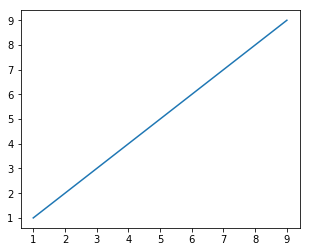

In [73]:
#creating an array obj
x = range(1,10)
y = [1,2,3,4,5,6,7,8,9]

plt.plot(x,y)

## Generating a line chart from a Pandas object

In [74]:
address = r'C:\Users\sousa\Downloads\Python for Data Science Essential Training\Ex_Files_Python_Data_Science_EssT\Ex_Files_Python_Data_Science_EssT\Exercise Files\Ch01\01_05\mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


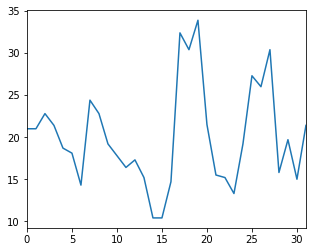

In [75]:
#I will use the mpg variable as a series object
mpg = cars['mpg']

mpg.plot()

## Making a small subset out of the cars dataframe

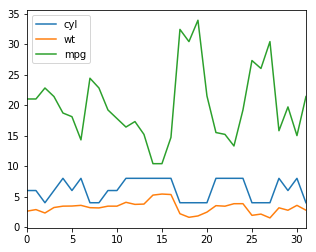

In [77]:
df = cars[['cyl', 'wt', 'mpg']]

df.plot()

<BarContainer object of 9 artists>

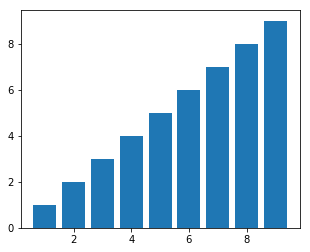

In [78]:
## Creating a bar chart from a list
plt.bar(x, y)

## Creating bar chart from a pandas obj

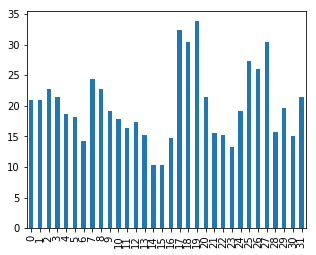

In [79]:
mpg.plot(kind = 'bar')

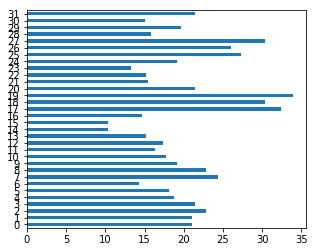

In [80]:
mpg.plot(kind = 'barh')

## Creating a pie chart

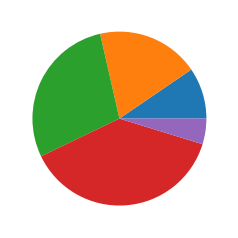

In [81]:
x = [1,2,3,4, 0.5]
plt.pie(x)
plt.show()

## Saving a plot as an image

In [82]:
plt.savefig('pie_chart.jpeg')
plt.show()

<Figure size 360x288 with 0 Axes>

In [83]:
#finding where it was saved
%pwd

'C:\\Users\\sousa'

## Defining plot elements